In [51]:
# Title     : Final Project - EDA of Wine Reviews
# Author    : Vikas Ranjan
# Date      : 7/25/2020

**Synopsis**

- For final project, I've picked up Wine reviews dataset to perform exploratory data analysis. 

In [2]:
# Import libaries

import matplotlib.pyplot as plt        
import numpy as np                     
import os           
import seaborn as sns
import pandas as pd                    
import thinkstats2
import thinkplot
import hypothesis
import statsmodels.formula.api as smf

In [3]:
def LoadWineReviewData():
    # Read csv file and load into a datafrane
    rawDF = pd.read_csv('C:/Users/F6PDP2A/Desktop/Sem4 - Final Project/winemag-data-130k-v2.csv')
    nRow, nCol = rawDF.shape
    print(f'There are {nRow} rows and {nCol} columns, in Wine review Dataset!')

    return rawDF

In [4]:
def missing_values_table(rawDF):
        zero_val = (rawDF == 0.00).astype(int).sum(axis=0)
        mis_val = rawDF.isnull().sum()
        mis_val_percent = 100 * rawDF.isnull().sum() / len(rawDF)
        misval_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        misval_table = misval_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        misval_table['Total Zero Missing Values'] = misval_table['Zero Values'] + misval_table['Missing Values']
        misval_table['% Total Zero Missing Values'] = 100 * misval_table['Total Zero Missing Values'] / len(rawDF)
        misval_table['% Total Missing Values'] = 100 * misval_table['Missing Values'] / len(rawDF)
        misval_table['Data Type'] = rawDF.dtypes
        misval_table = misval_table[
            misval_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(rawDF.shape[1]) + " columns and " + str(rawDF.shape[0]) + " Rows.\n"      
            "There are " + str(misval_table.shape[0]) +
              " columns that have missing values.")
        print ("There are ", sum(misval_table['% Total Missing Values'] > 50), "columns having greater than 50% missing value.")
        print ("There are ", sum(misval_table['% Total Missing Values'] > 40), "columns having greater than 40% missing value.")
        print ("There are ", sum(misval_table['% Total Missing Values'] > 30), "columns having greater than 30% missing value.")
        print ("There are ", sum(misval_table['% Total Missing Values'] > 20), "columns having greater than 20% missing value.")
        print ("There are ", sum(misval_table['% Total Missing Values'] > 10), "columns having greater than 10% missing value.")

        return misval_table

In [5]:
def cleanData(rawDF):
    # Remove duplicates from the raw dataset
    rawDF = rawDF.drop_duplicates('description')
    rawDF = rawDF[pd.notnull(rawDF.price)]
    # Drop unnecessary rows from the raw dataset
    rawDF = rawDF.drop(["Unnamed: 0", "region_2", "description"], axis=1)
    
    return rawDF

In [6]:
def RemoveNull(rawDF):
    rawDF_non_null = rawDF.dropna()
    nRow, nCol = rawDF_non_null.shape
    print(f'There are {nRow} rows and {nCol} columns, after removing all rows with null values')
    
    return rawDF_non_null

In [7]:
def plot_hist(var):
    hist = thinkstats2.Hist(var)
    thinkplot.Hist(hist,align='left')
    
    return hist

In [8]:
def plot_compare_hist(var_l, var_p, width=0.45):
    USWines_hist = thinkstats2.Hist(var_l, label='US Wines')
    FrenchWines_hist = thinkstats2.Hist(var_p, label='French Wines')

    thinkplot.PrePlot(2)
    thinkplot.Hist(USWines_hist, align='right', width=width)
    thinkplot.Hist(FrenchWines_hist, align='left', width=width)

    return USWines_hist, FrenchWines_hist

In [9]:
# Main Routine
rawDF = LoadWineReviewData()

There are 129971 rows and 14 columns, in Wine review Dataset!


In [10]:
# Identify data types
print("Below are the datatypes of the columns in the dataset:")
rawDF.dtypes

Below are the datatypes of the columns in the dataset:


Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [11]:
rawDF.describe(include='all',).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,129971,NaN,NaN,NaN,64985,37519.5,0,32492.5,64985,97477.5,129970
country,129908,43,US,54504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,129971,119955,This zesty red has pretty aromas that suggest ...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,92506,37976,Reserve,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,129971,NaN,NaN,NaN,88.4471,3.03973,80,86,88,91,100
price,120975,NaN,NaN,NaN,35.3634,41.0222,4,17,25,42,3300
province,129908,425,California,36247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,108724,1229,Napa Valley,4480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,50511,17,Central Coast,11065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,103727,19,Roger Voss,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Check for missing values in the raw dataset
missing_values_table(rawDF)

Your selected dataframe has 14 columns and 129971 Rows.
There are 9 columns that have missing values.
There are  1 columns having greater than 50% missing value.
There are  1 columns having greater than 40% missing value.
There are  1 columns having greater than 30% missing value.
There are  4 columns having greater than 20% missing value.
There are  5 columns having greater than 10% missing value.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,% Total Missing Values,Data Type
region_2,0,79460,61.1,79460,61.1,61.1,object
designation,0,37465,28.8,37465,28.8,28.8,object
taster_twitter_handle,0,31213,24.0,31213,24.0,24.0,object
taster_name,0,26244,20.2,26244,20.2,20.2,object
region_1,0,21247,16.3,21247,16.3,16.3,object
price,0,8996,6.9,8996,6.9,6.9,float64
country,0,63,0.0,63,0.0,0.0,object
province,0,63,0.0,63,0.0,0.0,object
variety,0,1,0.0,1,0.0,0.0,object


In [13]:
cleanDF = cleanData(rawDF)

In [14]:
#Remove all rows with NaN (Null Values)
cleanDF = RemoveNull(cleanDF)

There are 47660 rows and 11 columns, after removing all rows with null values


In [15]:
# Display head of dataframe
cleanDF.head()

,country,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
9,France,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
10,US,Mountain Cuvée,87,19.0,California,Napa Valley,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature


In [16]:
cleanDF.dtypes

country                   object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

**- Describe what the variables mean in the dataset (Chapter 1).**

We will focus on the following variables:
    - variety	
    - winery
    - points	
    - price	
    - province
    - country

In [17]:
# Calculate mean of all the variables in the dataframe.
# Commenting below code since it takes really long to execute
#cleanDF.mean()

**- Include a histogram of each of the variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).**

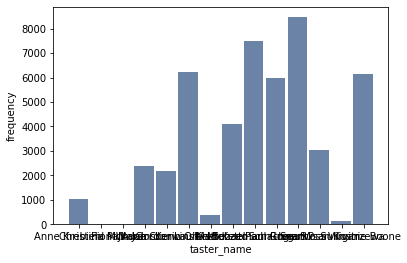

<Figure size 576x432 with 0 Axes>

In [18]:
# Plot histogram of variety
plot_hist(cleanDF.taster_name)
thinkplot.Show(xlabel='taster_name', ylabel='frequency')

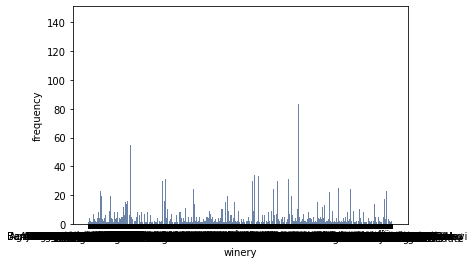

<Figure size 576x432 with 0 Axes>

In [19]:
# Plot histogram of winery
plot_hist(cleanDF.winery)
thinkplot.Show(xlabel='winery', ylabel='frequency')

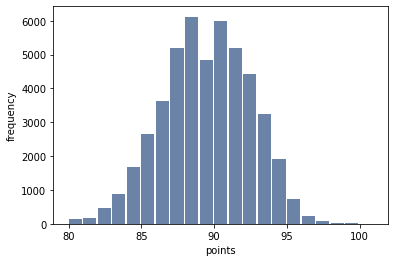

<Figure size 576x432 with 0 Axes>

In [20]:
# Plot histogram of points
plot_hist(cleanDF.points)
thinkplot.Show(xlabel='points', ylabel='frequency')

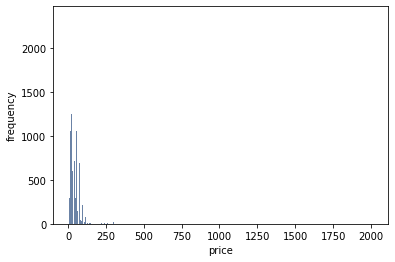

<Figure size 576x432 with 0 Axes>

In [21]:
# Plot histogram of price
plot_hist(cleanDF.price)
thinkplot.Show(xlabel='price', ylabel='frequency')

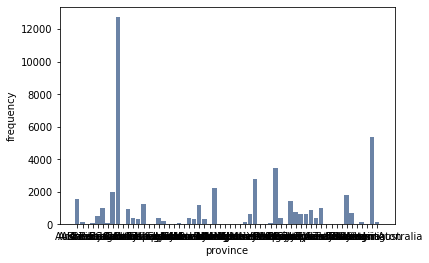

<Figure size 576x432 with 0 Axes>

In [22]:
# Plot histogram of province
plot_hist(cleanDF.province)
thinkplot.Show(xlabel='province', ylabel='frequency')

**- Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).**

In [23]:
cleanDF.describe(include='all',).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,47660,7,US,21803,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,47660,23251,Reserve,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,47660,NaN,NaN,NaN,89.0385,3.01925,80,87,89,91,100
price,47660,NaN,NaN,NaN,40.0067,37.4353,4,20,30,50,2013
province,47660,60,California,12732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,47660,987,Columbia Valley (WA),2281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,47660,14,Roger Voss,8459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_twitter_handle,47660,14,@vossroger,8459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,47660,47112,Segura Viudas NV Extra Dry Sparkling (Cava),7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variety,47660,419,Pinot Noir,6099,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Only price and points are numeric variables, therefore mean, median and other statistical functions are applicable.*** 

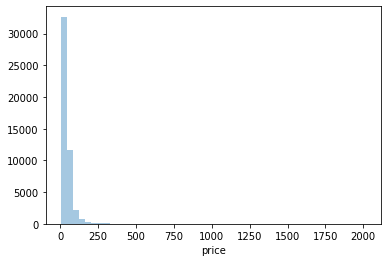

In [24]:
# Check the distribution of Price
sns.distplot(cleanDF['price'], kde=False);

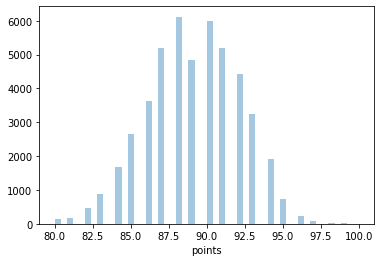

In [25]:
# Check the distribution of Points
sns.distplot(cleanDF['points'], kde=False);

In [26]:
# Create DFs with records for US wines which have scored more than 90 points.
USWines_DF = cleanDF[(cleanDF["country"] == "US") & (cleanDF["points"] > 90)]
USWines_DF.head()

,country,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
144,US,K Block,91,85.0,California,Spring Mountain District,Virginie Boone,@vboone,Terra Valentine 2013 K Block Cabernet Sauvigno...,Cabernet Sauvignon,Terra Valentine
145,US,Guidotti Vineyard,91,64.0,California,Santa Lucia Highlands,Matt Kettmann,@mattkettmann,Testarossa 2013 Guidotti Vineyard Pinot Noir (...,Pinot Noir,Testarossa
146,US,Family Reserve,91,68.0,California,Santa Ynez Valley,Matt Kettmann,@mattkettmann,Vincent Vineyards 2010 Family Reserve Cabernet...,Cabernet Sauvignon,Vincent Vineyards
147,US,Family Reserve,91,68.0,California,Santa Ynez Valley,Matt Kettmann,@mattkettmann,Vincent Vineyards 2012 Family Reserve Cabernet...,Cabernet Sauvignon,Vincent Vineyards
149,US,Destruction Level,91,35.0,California,Monterey,Matt Kettmann,@mattkettmann,Wrath 2013 Destruction Level Red (Monterey),Rhône-style Red Blend,Wrath


In [27]:
# Create DF with records for French wines which have scored more than 90 points.

FrenchWines_DF = cleanDF[(cleanDF["country"] == "France") & (cleanDF["points"] > 90)]
FrenchWines_DF.head()

,country,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
166,France,Charles de Batz,91,25.0,Southwest France,Madiran,Roger Voss,@vossroger,Domaine Berthoumieu 2013 Charles de Batz Tanna...,Tannat-Cabernet,Domaine Berthoumieu
292,France,Vin Jaune,92,45.0,France Other,Arbois,Roger Voss,@vossroger,Domaine Daniel Dugois 2006 Vin Jaune Savagnin ...,Savagnin,Domaine Daniel Dugois
353,France,Le Montrachet,96,630.0,Burgundy,Montrachet,Roger Voss,@vossroger,Louis Latour 2014 Le Montrachet (Montrachet),Chardonnay,Louis Latour
357,France,Vieilles Vignes,95,350.0,Burgundy,Clos de Vougeot,Roger Voss,@vossroger,Château de la Tour 2013 Vieilles Vignes (Clos...,Pinot Noir,Château de la Tour
359,France,Les Chenevottes Premier Cru,95,110.0,Burgundy,Chassagne-Montrachet,Roger Voss,@vossroger,Philippe Colin 2014 Les Chenevottes Premier Cr...,Chardonnay,Philippe Colin


In [28]:
USWines_DF1 = cleanDF[(cleanDF["country"] == "US") & (cleanDF["price"] < 250)]
FrenchWines_DF1 = cleanDF[(cleanDF["country"] == "France") & (cleanDF["price"] < 250)]

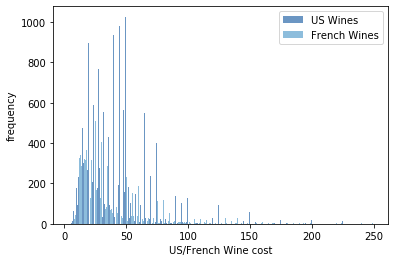

In [29]:
#  We are going to compare US wines to Frech wines.
plot_compare_hist(USWines_DF1.price, FrenchWines_DF1.price)    
thinkplot.Config(xlabel='US/French Wine cost', ylabel='frequency')

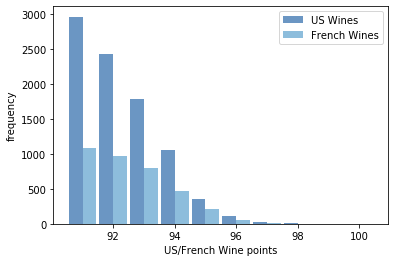

In [30]:
#  We are going to compare US wines to Frech wines.
plot_compare_hist(USWines_DF.points, FrenchWines_DF.points)    
thinkplot.Config(xlabel='US/French Wine points', ylabel='frequency')

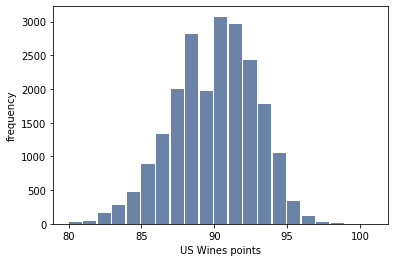

<Figure size 576x432 with 0 Axes>

In [31]:
# Plot histogram of points for US Wines with prices less than 250
plot_hist(USWines_DF1.points)
thinkplot.Show(xlabel='US Wines points', ylabel='frequency')

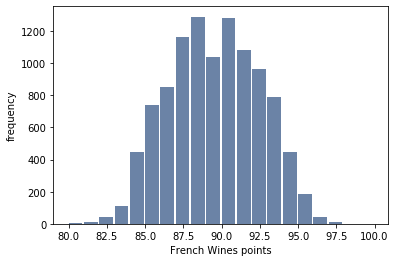

<Figure size 576x432 with 0 Axes>

In [32]:
# Plot histogram of points for French Wines with prices less than 250
plot_hist(FrenchWines_DF1.points)
thinkplot.Show(xlabel='French Wines points', ylabel='frequency')

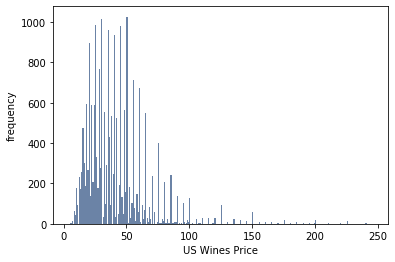

<Figure size 576x432 with 0 Axes>

In [33]:
# Plot histogram of price for US Wines with prices less than 250
plot_hist(USWines_DF1.price)
thinkplot.Show(xlabel='US Wines Price', ylabel='frequency')

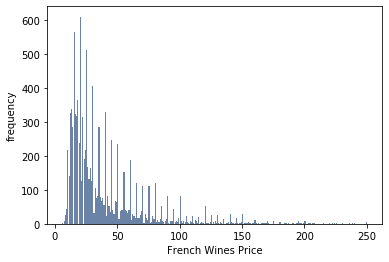

<Figure size 576x432 with 0 Axes>

In [34]:
# Plot histogram of price for French Wines with prices less than 250
plot_hist(FrenchWines_DF1.price)
thinkplot.Show(xlabel='French Wines Price', ylabel='frequency')

**- Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario.  Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).**

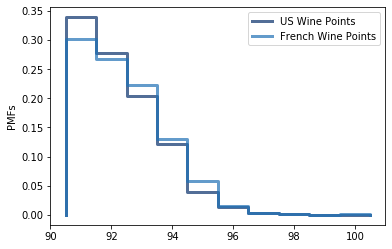

In [35]:
US_points_pmf = thinkstats2.Pmf(USWines_DF.points, label = 'US Wine Points')
French_points_pmf = thinkstats2.Pmf(FrenchWines_DF.points, label = 'French Wine Points')

thinkplot.Pmfs([US_points_pmf, French_points_pmf])
thinkplot.Config(xlabels='Points', ylabel='PMFs')

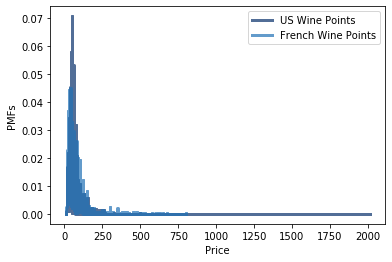

In [36]:
US_price_pmf = thinkstats2.Pmf(USWines_DF.price, label = 'US Wine Points')
French_price_pmf = thinkstats2.Pmf(FrenchWines_DF.price, label = 'French Wine Points')

thinkplot.Pmfs([US_price_pmf, French_price_pmf])
thinkplot.Config(xlabel='Price', ylabel='PMFs')

**- Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).**

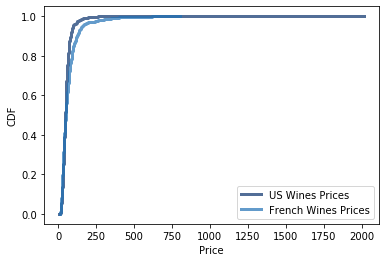

In [37]:
# Ploting CDF of price between US and French wines which have score greater than 90.
USWines_cdf = thinkstats2.Cdf(USWines_DF.price, label = 'US Wines Prices')
FrenchWines_cdf = thinkstats2.Cdf(FrenchWines_DF.price, label = 'French Wines Prices')
thinkplot.Cdfs([USWines_cdf, FrenchWines_cdf])
thinkplot.Config(xlabel = 'Price', ylabel = 'CDF')

**- Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).**

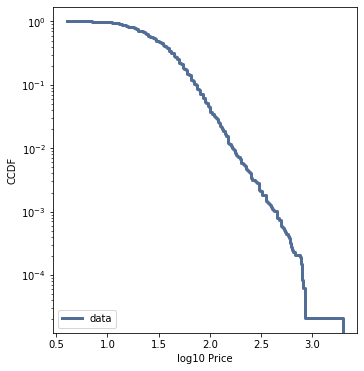

In [38]:
# Pareto Distribution on price
log_price = np.log10(cleanDF.price)
cdf_price = thinkstats2.Cdf(cleanDF.price, label='data')
cdf_price_log = thinkstats2.Cdf(log_price, label='data')

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=550, alpha=1.1, low=0, high=1e7)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='0.8')
thinkplot.PrePlot(cols=2)
thinkplot.Cdf(cdf_price_log, complement=True) 
thinkplot.Config(xlabel='log10 Price',
                 ylabel='CCDF',
                 yscale='log', loc='lower left')

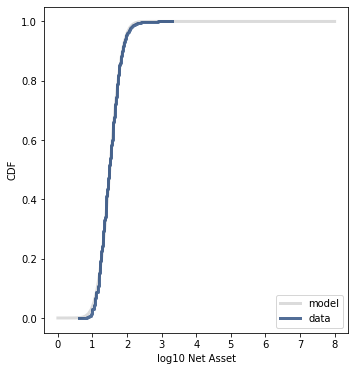

In [39]:
thinkplot.PrePlot(cols=2)

mu, sigma = log_price.mean(), log_price.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=8)
thinkplot.Plot(xs, ps, label='model', color='0.8')

thinkplot.Cdf(cdf_price_log) 
thinkplot.Config(xlabel='log10 Net Asset',
                 ylabel='CDF', loc='lower right')

**- Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).**

In [40]:
cleanDF.corr(method='pearson')

,points,price
points,1.000000,0.454493
price,0.454493,1.000000


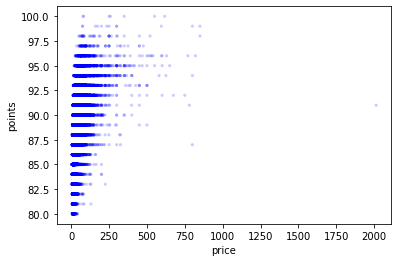

In [41]:
# plot Scatter Plot between price and points

thinkplot.Scatter(cleanDF.price, cleanDF.points, alpha=0.2, s=10)
thinkplot.Config(xlabel='price',
                 ylabel='points',
                 legend=False)

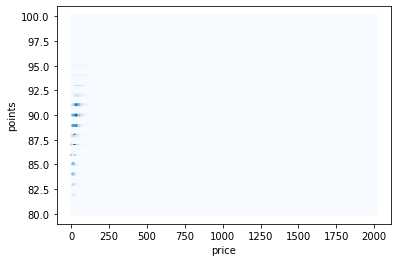

In [42]:
# An alternative to a scatter plot is something like a HexBin plot, which breaks the plane into bins, 
# counts the number of respondents in each bin, and colors each bin in proportion to its count.

thinkplot.HexBin(cleanDF.price, cleanDF.points)
thinkplot.Config(xlabel='price',
                 ylabel='points',
                 legend=False)

In [43]:
# Calculate Covariance
np.cov(cleanDF.price, cleanDF.points)

array([[1401.39975321,   51.36978635],
       [  51.36978635,    9.11587373]])

In [44]:
# Calculate pearson correlation

np.corrcoef(cleanDF.price, cleanDF.points)

array([[1.        , 0.45449341],
       [0.45449341, 1.        ]])

In [45]:
# Calculate Spearman's correlation and rank of each variable

cleanDF['points'] = cleanDF.points.rank()
cleanDF['price'] = cleanDF.price.rank()

In [46]:
np.corrcoef(cleanDF.price, cleanDF.points)

array([[1.        , 0.61776554],
       [0.61776554, 1.        ]])

**- Conduct a test on your hypothesis using one of the methods covered in Chapter 9.**

In [47]:
# Testing the difference in mean between profic and loss funds by morning star rating

data = USWines_DF.points, FrenchWines_DF.points
ht = hypothesis.DiffMeansPermute(data) # difference in means by permutation
p1 = ht.PValue(iters=10000)                       # Get the p-value
p1

0.0

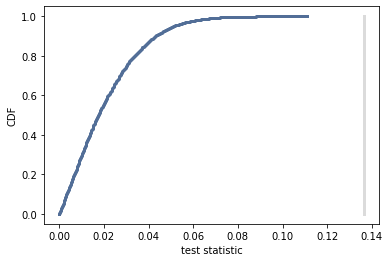

<Figure size 576x432 with 0 Axes>

In [48]:
ht.PlotCdf()
thinkplot.Show(xlabel='test statistic',
               ylabel='CDF')

**- For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).**

In [49]:
# We are creating a model to predict price of a wine based on the score.

formula = 'price ~ points'
model = smf.ols(formula, data=cleanDF).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                 2.941e+04
Date:                Sat, 08 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:40:49   Log-Likelihood:            -5.1033e+05
No. Observations:               47660   AIC:                         1.021e+06
Df Residuals:                   47658   BIC:                         1.021e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9043.0587     99.442     90.938      0.000    8848.152    9237.966
points         0.6205      0.004    171.502      0.000       0.613       0.628
==============================================================================
Omnibus:                      801.058   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              682.472
Skew:                           0.232   Prob(JB):                    6.36e-149
Kurtosis:                       2.641   Cond. No.                     5.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# Perform Prediction

columns = ['points']
new = pd.DataFrame([[97]], columns=columns)
model.predict(new)

0    9103.249713
dtype: float64